# 1D Linear Regression  

objective function / error function / cost function := same thing

NOTE : `@f/@x = (@f/@u) * (@u/@x)`   

```
E = sum[ (yi - (axi + b))^2 ]   
@E/@a = sum[ 2(yi - (axi+b))(-xi) ]  
      = -2sum(xi.yi) + 2a.sum(xi^2) + 2b.sum(xi) = 0    
         a.sum(xi^2) + b.sum(xi) = sum(xi.yi)
         a.ave(xi^2) + b.ave(xi) = ave(xi.yi)
    
@E/@b = sum[ 2(yi - (axi+b))(-1) ]   
      = -2sum(yi) + 2a.sum(xi) + 2b.sum(1) = 0 
         a.sum(xi) + bN = sum(yi)
         a.ave(xi) + b = ave(yi) 
       
 [[ ave(xi^2),  ave(xi) ], *   [[a],  =  [[ave(xi.yi)],
  [ ave(xi),    1       ]]      [b]]      [ave(yi)]]
       
                       1
 [[a],   =   ---------------------   [[ 1,         -ave(xi)],   * [[ave(xi.yi)],
  [b]]       ave(xi^2) - ave(xi)^2    [-ave(xi),   ave(xi^2)]      [ave(yi)]]
       
     mean(xi.yi) - mean(xi).mean(yi)                   sum(xi.yi) - sum(xi).mean(yi)
a =  ---------------------------------          =    ---------------------------------
      mean(xi^2) - mean(xi)^2                         sum(xi^2) - sum(xi)*mean(xi)
      

     mean(yi).mean(xi^2) - mean(xi).mean(xi.yi)        mean(yi).sum(xi^2) - mean(xi).sum(xi.yi)
b =  ------------------------------------------ =    ---------------------------------------------
      mean(xi^2) - mean(xi)^2                         sum(xi^2) - sum(xi)*mean(xi)

```

## Using data_1d.csv

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = []
Y = []

# load from file
for line in open('data_1d.csv'):
    x,y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

In [8]:
# To numpy array 
X = np.array(X)
Y = np.array(Y)

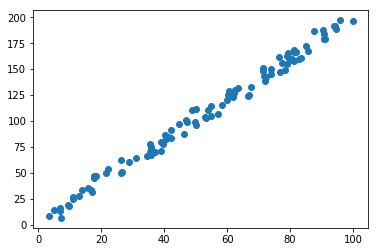

In [10]:
# Plot data 
plt.scatter(X,Y)
plt.show()

In [12]:
# Apply the equations we learned to calculate a and b 
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator 
b = ( Y.mean()*X.dot(X) - X.mean()*X.dot(Y) ) / denominator 

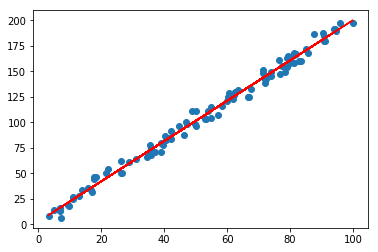

In [16]:
# Plot predicted Y 
Yhat = a*X + b 

plt.scatter(X,Y)
plt.plot(X,Yhat,'r-')
plt.show()

In [25]:
# R square
d1 = Y - Yhat 
d2 = Y - Y.mean()
SSres = d1.dot(d1)                
SStot = d2.dot(d2)
E = 1 - SSres/SStot 
print('the R-square = ', E)

the R-square =  0.9911838202977805


## Moore's law

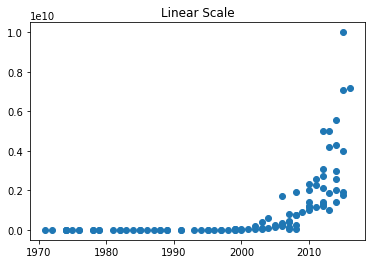

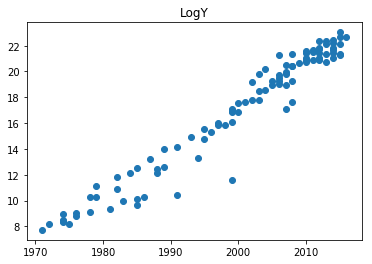

In [37]:
import re    # regular expression 
import numpy as np 
import matplotlib.pyplot as plt 

X = [] 
Y = []

non_decimal = re.compile(r'[^\d]+')
for line in open('moore.csv'):
    r = line.split('\t')
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y) 

plt.scatter(X,Y)
plt.title('Linear Scale')
plt.show()

Y = np.log(Y)
plt.scatter(X,Y)
plt.title('LogY')
plt.show()

In [40]:
denominator = X.dot(X) - X.mean()*X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator 
b = ( Y.mean()*X.dot(X) - X.mean()*X.dot(Y) ) / denominator 

Yhat = a*X + b 

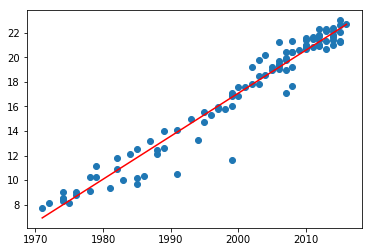

In [43]:
plt.scatter(X,Y) 
plt.plot(X,Yhat,'r-')
plt.show()

In [45]:
d1 = Y - Yhat 
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2) 
print('a:', a, 'b:', b)
print('the r-squared is:', r2)

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576


### Calculate time for doubling transister count (tc)

Model we used for this 1D regression is as follows 
>` ln(tc) = a*year + b`  
>` tc = exp(b) * exp(a*year)`  

Calculate left side as 2*tc =... 
>` 2*tc = 2*exp(b) * exp(a*year) `  
> ` = exp(ln(2)) * exp(b) * exp(a*year) `   
>`  = exp(b) * exp(a*year + ln(2)) `   

So, doubling tc from year1 to year2, i.e., 
>` exp(b) * exp(a*year2) = exp(b) * exp(a*year1 + ln(2))`   

>` a*year2 = a*year1 + ln(2)`  
>` yea2 = year1 + ln(2)/a `  


In [47]:
# How to estimate time for transister count (tc) to double ]
#
# Model we used is as follows: 
#  ln(tc) = a*year+ b 
#  tc = exp(b) * exp(a*year)
#
#  Calculte left as 2*tc
#  2*tc = 2*exp(b) * exp(a*year) = exp(ln(2))*exp(b)*exp(a*year)
#                                = exp(b)*exp(a*year + ln(2))
#
# So, doubleing tc from year1 to year2, i.e., 
#  exp(b)*exp2(a*year2) = exp(b)*exp(a*year1 + ln2)
#  a*year2 = a*year1 + ln2 
#  year2 = year1 + ln2/a
#
print('time to double: ', np.log(2)/a, 'years')

time to double:  1.9745331723797188 years
